In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm

In [2]:
rng = np.random.default_rng(0)

**2.** Let $X_1, \dots, X_n \sim U(a,b)$ where $a$ and $b$ are unkown parameters and $a<b$. Let $\tau = \int x \, dF(x)$. Suppose that $a=1$, $b=3$, and $n = 10$. Find the MSE of $\widehat{\tau}$ (the MLE of $\tau$) by simulation. Compare with the MSE of the non-parametric plug-in estimator.

Recall Wasserman's formula is
$$
\widehat{\text{se}}_{\text{boot}} = \sqrt{\frac{\sum_{b=1}^B(\widehat{\tau}^*_b - \widehat{\tau})^2}{B}}.
$$
By definition,
$$
\text{MSE}_{\text{boot}} = \left( \widehat{\text{se}}_{\text{boot}} \right)^2.
$$
Careful: $\widehat{\text{se}}_{\text{boot}}$ is not a standard error in the frequentist sense (the square root of variance) - Wasserman's formula already contains the bootstrap bias and bootstrap variance:
$$
\widehat{\text{se}}_{\text{boot}} = \text{bias}_{\text{boot}}^2 + \text{Var}_{\text{boot}}.
$$

In [3]:
a, b, n, B = 1, 3, 10, 10_00

x = rng.uniform(a, b, size=n)
a_hat, b_hat = x.min(), x.max()
tau_hat = 0.5 * (a_hat + b_hat)

y = rng.uniform(a_hat, b_hat, size=(B, n))
tau_boot = 0.5 * (y.min(axis=1) + y.max(axis=1))

mse_boot = np.mean((tau_boot - tau_hat)**2)

print(f'MSE_boot: {mse_boot:.4f}')
print(f'MSE_plug-in: {(b-a) ** 2 / (12 * n):.4f}')

MSE_boot: 0.0112
MSE_plug-in: 0.0333


**3.** Let $X_1, \dots, X_n \sim N(\mu,\sigma^2)$. Let $\tau$ be the 95 percentile, i.e., $P(X < \tau) = .95$. Find the standard error of the MLE $\widehat{\tau}$ using the parametric bootstrap.

In [4]:
B = 10_00

data = np.array([ 3.23, -2.50,  1.88, -0.68,  4.43,  0.17,
                  1.03, -0.07, -0.01,  0.76,  1.76,  3.18,
                  0.33, -0.31,  0.30, -0.61,  1.52,  5.43,
                  1.54,  2.28,  0.42,  2.33, -1.03,  4.00,
                  0.39])

mu_hat = data.mean()
sigma_hat = data.std(ddof=0)
tau_hat = mu_hat + norm.ppf(0.95) * sigma_hat

boot = rng.normal(mu_hat, sigma_hat, size=(B, len(data)))

mu_boot = boot.mean(axis=1)
sigma_boot = boot.std(axis=1, ddof=0)
tau_boot = mu_boot + norm.ppf(0.95) * sigma_boot

# tau_boot = np.quantile(boot, 0.95, axis=1) would be correct
# if the estimator was the sample 95th quantile - not the MLE 

se_boot  = np.sqrt(np.mean((tau_boot  - tau_hat)**2))

print(f"Bootstrap SE:  {se_boot:.4f}")

Bootstrap SE:  0.5587


**7.** (Comparing two treatments.) Let $i=1,2$. $n_i$ people are given treatment $i$. Let $X_i$ be the number of people who respond favorably to treatment $i$. Assume that $X_i \sim \text{Binomial}(n_i,p_i)$. Let $\psi = p_1-p_2$. Suppose that $n_1=n_2=200$, $X_1=160$, $X_2=148$. Find the MLE $\widehat{\psi}$. Find an approximate 90 percent confidence interval using the parametric bootstrap.

In [5]:
z95 = norm.ppf(0.95)

n1, n2, x1, x2 = 200, 200, 160, 148
p1, p2 = x1/n1, x2/n2
mle = p1-p2

se_delta = np.sqrt(((p1*(1-p1))/n1) + ((p2*(1-p2))/n2))
ci_delta  = (mle - z95 * se_delta, mle + z95 * se_delta)

B=10_00
rng = np.random.default_rng(0)
boot1 = rng.binomial(n1, p1, size=B) / n1
boot2 = rng.binomial(n2, p2, size=B) / n2
boot = boot1 - boot2
se_boot = np.sqrt(np.mean((boot-mle)**2))

q05, q95 = np.quantile(boot, [0.05, 0.95])

ci_norm = (mle - z95 * se_boot, mle + z95 * se_boot)
ci_perc = (q05, q95)
ci_pivo = (2 * mle - q95, 2 * mle - q05)

print(f'MLE: {mle:.4f}')

print(f"Delta SE: {se_delta:.4f}")
print(f"Bootstrap SE: {se_boot:.4f}")

print(f'Delta: ({ci_delta[0]:.4f}, {ci_delta[1]:.4f})')
print(f'Normal (Boot): ({ci_norm[0]:.4f}, {ci_norm[1]:.4f})')
print(f'Percentile (Boot): ({ci_perc[0]:.4f}, {ci_perc[1]:.4f})')
print(f'Pivotal (Boot): ({ci_pivo[0]:.4f}, {ci_pivo[1]:.4f})')

MLE: 0.0600
Delta SE: 0.0420
Bootstrap SE: 0.0428
Delta: (-0.0090, 0.1290)
Normal (Boot): (-0.0104, 0.1304)
Percentile (Boot): (-0.0100, 0.1300)
Pivotal (Boot): (-0.0100, 0.1300)


**9.** Let $X_1, \dots, X_n \sim N(\mu,1)$. Create a data set consisting of $n=100$ observations. Let $\theta = e^\mu$ and let $\widehat{\theta} = e^{\overline{X}}$ be the MLE. (a) Find $\widehat{\text{se}}$ and a 95 percent confidence interval using (i) the delta method, (ii) the parametric bootstrap, and (iii) the non-parametric bootstrap. (b) Plot a histogram of the bootstrap replications for the parametric and non-parametric bootstraps. These are estimates of the distribution of $\widehat{\theta}$. The delta method also gives an approximation to this distribution, namely, $N(\widehat{\theta}, \text{se}^2)$. Compare this to the true sampling distribution of $\widehat{\theta}$ (which you can get by simulation).

Theta MLE: 160.9505
Delta SE: 16.0950
Parametric bootstrap SE: 17.0317
Non-parametric bootstrap SE: 16.4855
Delta: (129.4048, 192.4962)
Normal (PBoot): (127.5690, 194.3319)
Percentile (PBoot): (132.0197, 199.1314)
Pivotal (PBoot): (122.7696, 189.8812)
Normal (NPBoot): (128.6395, 193.2614)
Percentile (NPBoot): (133.7247, 197.1297)
Pivotal (NPBoot): (124.7713, 188.1762)


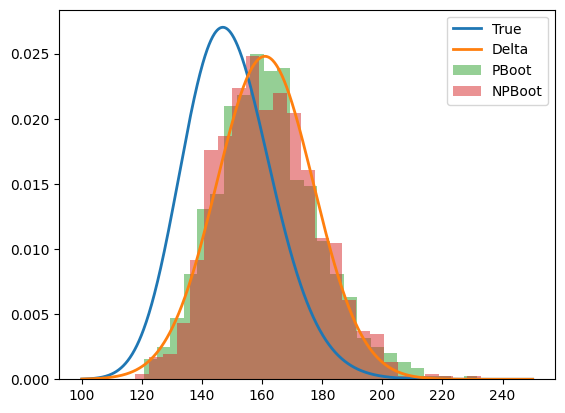

In [6]:
z975 = norm.ppf(0.975)

mu=5
n=100

rng = np.random.default_rng(0)
x = rng.normal(mu,1,size=n)

mu_mle = x.mean()
theta_mle = np.exp(mu_mle)
se_mu = 1 / np.sqrt(n)
se_delta = theta_mle * se_mu
ci_delta = (theta_mle - z975 * se_delta, theta_mle + z975 * se_delta)

B=10_00
pboot = rng.normal(mu_mle,1,size=(B,n))
theta_pboot = np.exp(pboot.mean(axis=1))
se_pboot = np.sqrt(np.mean((theta_pboot-theta_mle)**2))

pq025, pq975 = np.quantile(theta_pboot, [0.025, 0.975])

ci_pnorm = (theta_mle - z975 * se_pboot, theta_mle + z975 * se_pboot)
ci_pperc = (pq025, pq975)
ci_ppivo = (2 * theta_mle - pq975, 2 * theta_mle - pq025)

idx = rng.integers(0, n, size=(B,n))
npboot = x[idx]
theta_npboot = np.exp(npboot.mean(axis=1))
se_npboot = np.sqrt(np.mean((theta_npboot-theta_mle)**2))

npq025, npq975 = np.quantile(theta_npboot, [0.025, 0.975])

ci_npnorm = (theta_mle - z975 * se_npboot, theta_mle + z975 * se_npboot)
ci_npperc = (npq025, npq975)
ci_nppivo = (2 * theta_mle - npq975, 2 * theta_mle - npq025)

print(f'Theta MLE: {theta_mle:.4f}')

print(f"Delta SE: {se_delta:.4f}")
print(f"Parametric bootstrap SE: {se_pboot:.4f}")
print(f'Non-parametric bootstrap SE: {se_npboot:.4f}')

print(f'Delta: ({ci_delta[0]:.4f}, {ci_delta[1]:.4f})')

print(f'Normal (PBoot): ({ci_pnorm[0]:.4f}, {ci_pnorm[1]:.4f})')
print(f'Percentile (PBoot): ({ci_pperc[0]:.4f}, {ci_pperc[1]:.4f})')
print(f'Pivotal (PBoot): ({ci_ppivo[0]:.4f}, {ci_ppivo[1]:.4f})')

print(f'Normal (NPBoot): ({ci_npnorm[0]:.4f}, {ci_npnorm[1]:.4f})')
print(f'Percentile (NPBoot): ({ci_npperc[0]:.4f}, {ci_npperc[1]:.4f})')
print(f'Pivotal (NPBoot): ({ci_nppivo[0]:.4f}, {ci_nppivo[1]:.4f})')

z = np.linspace(100, 250, 1000)
pdf_true = lognorm.pdf(z, s=1/np.sqrt(n), scale=np.exp(mu))
pdf_delta = norm.pdf(z, loc=theta_mle, scale=se_delta)

plt.plot(z, pdf_true, lw=2, label='True')
plt.plot(z, pdf_delta, lw=2, label='Delta')
plt.hist(theta_pboot, bins=25, density=True, alpha=0.5, label='PBoot')
plt.hist(theta_npboot, bins=25, density=True, alpha=0.5, label='NPBoot')
plt.legend()
plt.show()

**10.** Let $X_1, \dots, X_n \sim U(0, \theta)$. The MLE is $\widehat{\theta} = \max \{ X_1, \dots, X_n \}$. Generate a data set of size $n=50$ with $\theta=1$. Compare the true distribution of $\widehat{\theta}$ to the histograms from the parametric and non-parametric bootstraps.

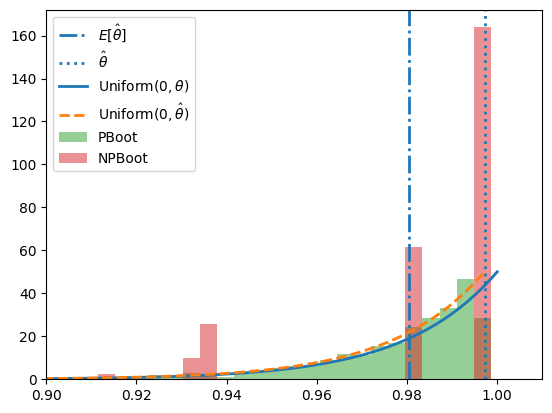

In [7]:
theta=1
n=50
B=1000

rng = np.random.default_rng(0)
x = rng.uniform(0, theta, size=n)
theta_hat = x.max()

pboot = rng.uniform(0, theta_hat, size=(B,n))
ptBoot = pboot.max(axis=1)

idx = rng.integers(0, n, size=(B,n))
npboot = x[idx]
nptBoot = npboot.max(axis=1)

y = np.linspace(0,1,1000)
pdf_theta_hat = n * y ** (n-1)

y_hat = np.linspace(0, theta_hat, 1000)
pdf_true_thetahat = (n / (theta_hat**n)) * y_hat**(n-1)

E_true = n/(n+1) * theta

plt.figure()
plt.axvline(E_true, lw=2, linestyle='-.', label=r'$E[\hat{\theta}]$')
plt.axvline(theta_hat, lw=2, linestyle=':', label=r'$\hat{\theta}$')
plt.plot(y, pdf_theta_hat, lw=2, label=r'Uniform$(0,\theta)$')
plt.plot(y_hat, pdf_true_thetahat, lw=2, linestyle='--', label=r'Uniform$(0,\hat{\theta})$')
bins = np.linspace(0.9, 1.01, 30) 
plt.hist(ptBoot, bins=bins, density=True, alpha=0.5, label='PBoot')
plt.hist(nptBoot, bins=bins, density=True, alpha=0.5, label='NPBoot')
plt.xlim(0.9, 1.01)
plt.ylim(bottom=0)
plt.legend()
plt.show()